# Digital Text in the Humanities

## Project work

In [58]:
from normalization_functions import *
from analytics_functions import *
from gender_classifier import *
from visualizations_functions import *
from testNRCLEX import *
from plotnine import ggplot, aes, geom_bar

### Section 1: Corpora & Texts

#### 1.1) Corpora creation and presentation

During this first step, the aim is to create the two distinct corpora over which our project is based:

In [59]:
f_directory = "Raw/F/"
m_directory = "Raw/M/"
f_corpus = create_corpus(f_directory)
m_corpus = create_corpus(m_directory)

At this point, we extract the urls and titles of all the texts in our corpora in order to visualize them:

In [60]:
f_authors_texts = list()
f_titles = list()
for url in f_corpus.fileids():
    if url != '.DS_Store':
        f_authors_texts.append(f_directory+url)
        f_titles.append(url[:-4])

m_authors_texts = list()
m_titles = list()
for url in m_corpus.fileids():
    if url != '.DS_Store':
        m_authors_texts.append(m_directory+url)
        m_titles.append(url[:-4])

print("URLS of female authors texts:", f_authors_texts, '\n')
print("Titles of female authors texts:", f_titles, '\n')
print("URLS of male authors texts:", m_authors_texts, '\n')
print("Titles of male authors texts:", m_titles, '\n')

URLS of female authors texts: ['Raw/F/1857_grannys_wonderful_chair.txt', 'Raw/F/1869_mrs_overtheways_remembrances.txt', 'Raw/F/1872_a_dog_of_flanders.txt', 'Raw/F/1877_black_beauty.txt', 'Raw/F/1877_the_cuckoo_clock.txt', 'Raw/F/1886_little_lord_fauntleroy.txt', 'Raw/F/1899_the_story_of_the_treasure_seekers.txt', 'Raw/F/1902_the_tale_of_peter_rabbit.txt'] 

Titles of female authors texts: ['1857_grannys_wonderful_chair', '1869_mrs_overtheways_remembrances', '1872_a_dog_of_flanders', '1877_black_beauty', '1877_the_cuckoo_clock', '1886_little_lord_fauntleroy', '1899_the_story_of_the_treasure_seekers', '1902_the_tale_of_peter_rabbit'] 

URLS of male authors texts: ['Raw/M/1857_tom_browns_school_days.txt', 'Raw/M/1865_alices_adventures_in_wonderland.txt', 'Raw/M/1869_david_copperfield.txt', 'Raw/M/1871_at_the_back_of_the_north_wind.txt', 'Raw/M/1876_the_adventures_of_tom_sawyer.txt', 'Raw/M/1883_treasure_island.txt', 'Raw/M/1888_the_happy_prince_and_other_tales.txt', 'Raw/M/1894_the_jungle

#### 1.2) Basic analytics: Dimensions

The first thing we should analyze is the dimension of our corpora.

In order to do that we will use the following two functions contained in the [analytics file](analytics_functions.py):
- <span style="color:#EDAE49">corpus_size</span>: useful in order to compute the total number of texts in each corpus;
- <span style="color:#EDAE49">corpus_dimension</span>: thought in order to determine the total number of tokens in a corpus.

In [61]:
print("The size of our corpus of female authors is:", corpus_size(f_corpus))
print("The size of our corpus of male authors is:", corpus_size(m_corpus))

The size of our corpus of female authors is: 8
The size of our corpus of male authors is: 8


In [62]:
print("The dimension of our corpus of female authors is:", corpus_dimension(f_directory))
print("The dimension of our corpus of male authors is:", corpus_dimension(m_directory))

The dimension of our corpus of female authors is: 311692
The dimension of our corpus of male authors is: 798740


Now, what we want to do is to compute the lexical richeness of the texts contained in each corpus.</br>
In order to do that, we will use the <span style="color:#EDAE49">lexical_richeness</span> function, that will compute the lexical richeness of each text and return a dictionary in which such values will be stored.

In addition to the different values, we have also used some interactive graphical representations (taken from the [NotebookJS repository](https://github.com/jorgehpo/notebookJS)) to display differences between texts.

In [63]:
f_author_richness = lexical_richness(f_authors_texts)

file = "Visualizations/f_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/f_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in f_author_richness:
    print(key[11:-4], ":", f_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(f_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/f_lexical_richness.csv")

grannys_wonderful_chair : 0.10592697124713353
mrs_overtheways_remembrances : 0.10719462492113027
a_dog_of_flanders : 0.18703924734957522
black_beauty : 0.06745258670929284
the_cuckoo_clock : 0.13014949766860548
little_lord_fauntleroy : 0.07892194253750318
the_story_of_the_treasure_seekers : 0.07457838621474318
the_tale_of_peter_rabbit : 0.3944954128440367


In [64]:
m_author_richness = lexical_richness(m_authors_texts)

file = "Visualizations/m_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/m_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in m_author_richness:
    print(key, ":", m_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(m_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/m_lexical_richness.csv")

Raw/M/1857_tom_browns_school_days.txt : 0.08352087554978663
Raw/M/1865_alices_adventures_in_wonderland.txt : 0.09396832364022092
Raw/M/1869_david_copperfield.txt : 0.03824850505662873
Raw/M/1871_at_the_back_of_the_north_wind.txt : 0.057148611002338305
Raw/M/1876_the_adventures_of_tom_sawyer.txt : 0.09812937468447695
Raw/M/1883_treasure_island.txt : 0.08336663051544038
Raw/M/1888_the_happy_prince_and_other_tales.txt : 0.13101049548450086
Raw/M/1894_the_jungle_book.txt : 0.08745792533659731


Once we have such measures of lexical richness, we can move on by computing the mean of them.

In [65]:
f_lexical_richness_total = 0
for key in f_author_richness:
    f_lexical_richness_total += f_author_richness[key]
print("The average lexical richness of the female authors corpus is:", f_lexical_richness_total/corpus_size(f_corpus))

The average lexical richness of the female authors corpus is: 0.14321983368650257


In [66]:
m_lexical_richness_total = 0
for key in m_author_richness:
    m_lexical_richness_total += m_author_richness[key]
print("The average lexical richness of the male authors corpus is:", m_lexical_richness_total/corpus_size(m_corpus))

The average lexical richness of the male authors corpus is: 0.08410634265874876


<i>Such kind of analysis, based on lexical richness, will be re-used later in order to have a comparison measure</i>.

For now, the only conclusion that we can draw from this first step is that in our corpora, female authors use a richer lexicon with respect to male authors.

<span style="color:red">Some considerations about representativeness and balance of corpora TO BE ADDED</span>

### Section 2: Gender classification

#### 2.1) Create dictionaries

In this second section, we aim at creating some basic elements useful to store and control the information that we will extract from our corpora and to compute some statistics.</br>
This first analysis has been performed by reusing, enhancing and modifying (also by adding a sentiment analysis of sentences) the code used by <b>Neal Caren</b> in his project ["Using Python to see how the Times writes about men and women"](http://nealcaren.github.io/text-as-data/html/times_gender.html).

As a first step we will need two different sets of words associated with female and male context.</br>
Such sets have been taken from the <span style="color:#B4D6D3">[Jailbreak-the-Patriarchy Project](https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)</span> and enhanced where necessary, according to our view and to our context.

In [67]:
male_words=set(['guy','dr','spokesman','chairman',"men's",'men','him',"he's",'his','boy',
'boyfriend','boyfriends','boys','brother','brothers','dad','dads','dude','father',
'fathers','fiance','gentleman','gentlemen','god','grandfather','grandpa',
'grandson','groom','he','himself','husband','pastor','husbands','king','male','man',
'mr','nephew','nephews','priest','prince','son','sons','uncle','uncles',
'waiter','widower','widowers','he is'])

female_words=set(['heroine','drss','spokeswoman','chairwoman',"women's",'actress','women',
"she's",'her','aunt','aunts','bride','daughter','daughters','female','fiancee','girl',
'girlfriend','girlfriends','girls','goddess','granddaughter','grandma','grandmother',
'herself','ladies','lady','mom','moms','mother','mothers','mrs','ms','niece',
'nieces','priestess','princess','queens','she','sister','sisters','waitress',
'widow','widows','wife','wives','woman','she is'])

Seen that we are working with children's literature, one possible issue is the recognition of animals and the possible imbalance that may derive in the statistics.</br>
To avoid the problem, we took this [animals name txt file](https://gist.github.com/atduskgreg/3cf8ef48cb0d29cf151bedad81553a54) and compiled a list from it.</br>
Such list will be useful to clear the words that we will analyze in the following steps.

In [68]:
animals = text_reader("Useful elements and texts/animals_list.txt")
animals_list = list()
for row in animals.split():
  animals_list.append(row.lower())
animals_list = set(animals_list)

The same will be performed for a list of common words that we have taken from the [reddit analysis project](https://github.com/rhiever/reddit-analysis/blob/master/redditanalysis/words/common-words.txt).

In [69]:
commons = text_reader("Useful elements and texts/common_ws_list.txt")
common_ws_list = list()
for row in commons.split():
  common_ws_list.append(row.lower())
common_ws_list = set(common_ws_list)

Now, we need some dictionaries in order to store the data extracted from corpora. Such <i>dictionaries</i> will be created starting from a list of <i>gender definition terms</i> and they will be proper of each corpus and will contain the following information and elements:
- <span style="color:#EDAE49">sentence_counter</span>: this first dictionary will be useful in order to count the total number of gendered sentences in each text (and, by consequence, in each corpus);
- <span style="color:#EDAE49">word_counter</span>: this will contain the raw count of the whole words associated with gendered sentences;
- <span style="color:#EDAE49">word_freq</span>: finally, this last dictionary will contain the specific count of each one of the words associated to a gendered sentence.

In [70]:
list_of_gender = ['male','female','mainly_male','mainly_female','none','both']

Now that we have the list of possible <i>gender classifications</i>, we procede by creating the dictionaries for our corpora.</br>
Such dictionaries will begin with an <span style="color:#B4D6D3">f</span> if associated with the corpus of female authors and with an <span style="color:#B4D6D3">m</span> if associated to the corpus of male authors.

In [71]:
f_sentence_counter = {sex:0 for sex in list_of_gender}
f_word_counter = {sex:0 for sex in list_of_gender}
f_word_freq = {sex:{} for sex in list_of_gender}

m_sentence_counter = {sex:0 for sex in list_of_gender}
m_word_counter = {sex:0 for sex in list_of_gender}
m_word_freq = {sex:{} for sex in list_of_gender}

Now, we need to create two dictionaries to save all the words used by female and male authors in a raw count.

In [72]:
male_authors_raw_count = dict()
female_authors_raw_count = dict()

We will also need two dictionaries in which we can store proper nouns extracted from our corpora.

In [73]:
f_proper_nouns = {}
m_proper_nouns = {}

For our analysis we will need other two dictionaries in order to score the sentiment polarity of sentences.</br>
To create such dictionaries we will start from a list of possible sentiment classifications.

In [74]:
list_of_sentiments = ["POS", "NEG", "NEU"]

Then, we procede by creating the two dictionaries for sentiment analysis, one for each corpus.

In [75]:
f_sentiment = {sex:{sentiment: {} for sentiment in list_of_sentiments} for sex in list_of_gender}
m_sentiment = {sex:{sentiment: {} for sentiment in list_of_sentiments} for sex in list_of_gender}
f_emotions = dict()
m_emotions = dict()

Finally, we need to create some sets in which we will store the extracted common words for each specific case.

In [76]:
#For female authors
f_male_general = set()
f_male_nouns = set()
f_male_verbs = set()
f_male_adjectives = set()

f_female_general = set()
f_female_nouns = set()
f_female_verbs = set()
f_female_adjectives = set()

#For male authors
m_male_general = set()
m_male_nouns = set()
m_male_verbs = set()
m_male_adjectives = set()

m_female_general = set()
m_female_nouns = set()
m_female_verbs = set()
m_female_adjectives = set()

Once we have created our dictionaries, sets and lists, we can move a step forward and start to analyze our corpora.

#### 2.2) Corpus analysis: female authors 

Let's start by analyzing the <i>corpus of female authors</i>.

The first thing we may want to do is to analyze it thanks to the functions contained in the document for the [gender classification of sentences](gender_classifier.py).</br>
In particular, we will call the main function of this file, that is <span style="color:#EE6352">gender_analysis</span>, on each text in our "female authors corpus".

In [77]:
for url in f_authors_texts:
    text = text_reader(url)
    gender_analysis(text, f_sentence_counter, f_word_counter, female_authors_raw_count, f_word_freq, f_sentiment, f_proper_nouns, male_words, female_words)

As you can see in the source code for [gender analysis](gender_classifier.py), we have used a function to store all the possible proper_nouns (this choice has been driven by the less accurate POS-tagging classification of NNP - by means "Proper Nouns").

Thanks to this script we have analyzed, gendered and given a polarity score as well as a qualitative sentiment label to the sentences of each one of the texts contained inside the reference corpus and we have fulfilled the dictionaries related to such corpus.

Now, we need to extract the proper nouns contained in our texts.</br> <span style="color:red">According to our code, proper nouns are such words which appear capitalized with a probability of 100% inside our text in a position different from the first position of each sentence (as the function to recognize them states).</span></br>
Moreover, some particular situations have been taken into account (an example of it is the occurence of "I" and of punctuation, these have been considered and removed from the list of proper nouns).

In [78]:
f_proper_nouns_set = set([word for word in f_proper_nouns if  
                        f_proper_nouns[word].get('upper',0) / 
            (f_proper_nouns[word].get('upper',0) + f_proper_nouns[word].get('lower',0)) 
                        == 1])

Now, in order to display some statistics about the most frequent words in gendered sentences, we first need to compute a list of the most <span style="color:#F7D6E0">common words in female and male sentences</span>.</br>
The easiest way to do that is to retrieve our sorted <i>word_freq</i> dictionaries and to take out from these the most common words from the '<u><i>female</i></u>' and '<u><i>male</i></u>' keys.</br>
From such list we will need to take out all the words used together with a specific gender classification.

In [79]:
f_common_words=set([w for w in sorted (f_word_freq['female'],key=f_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (f_word_freq['male'],key=f_word_freq['male'].get,reverse=True)[:1000]])
f_common_words=list(f_common_words-male_words-female_words-f_proper_nouns_set-animals_list-common_ws_list)

The first operation to perform on the common_words list is to POS-tag the words that are stored inside it.</br>
Such POS-tagged words will be placed inside a dictionary and we will print out all the different POS in order to perform a more accurate analysis of the corpus in the subsequent stage.</br>
The decision to use the universal POS-tagger is due to the fact that tagging operations in NLP are not so accurate, therefore we preferred to use a more general (so, with less definens) tagset.

In [80]:
f_tagged_words = {}
for word in pos_tagging(f_common_words, True):
    if word[1] not in f_tagged_words:
        f_tagged_words[word[1]] = []
    f_tagged_words[word[1]].append(word[0])
print(f_tagged_words.keys())   

dict_keys(['ADJ', 'NOUN', 'VERB', 'ADP', '.', 'ADV', 'PRT', 'NUM', 'PRON', 'X', 'DET'])


As a last step of this first part of the process, we will print out the difference between gendered and not-gendered sentences in terms of raw percentages of gendered sentences and in terms of sentiments associated to different genders.

In [81]:
print ('%.1f%% gendered' % (100*(f_sentence_counter['male'] + f_sentence_counter['female'])/
                           (f_sentence_counter['male'] + f_sentence_counter['female'] + f_sentence_counter['mainly_female'] + 
                           f_sentence_counter['mainly_male'] + f_sentence_counter['both'] + f_sentence_counter['none'])))
print ('%s sentences about men.' % f_sentence_counter['male'])
print ('%s sentences about women.' % f_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (f_sentence_counter['male']/f_sentence_counter['female']))

34.2% gendered
3944 sentences about men.
1711 sentences about women.
2.3 sentences about men for each sentence about women.


Finally, we can move on into seeing the sentiment related data extracted from our corpus.

In [82]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0

for sentiment in f_sentiment["male"]:
    for sentence in f_sentiment["male"][sentiment]:
        if sentiment == 'POS':
            positive_score += f_sentiment["male"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += f_sentiment["male"][sentiment][sentence]
            negative_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("In the FEMALE AUTHORS CORPUS:")
print("Over the", positive_count, "positive sentences about male, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about male, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about male is:", (positive_score+negative_score)/(positive_count+negative_count))

In the FEMALE AUTHORS CORPUS:
Over the 1825 positive sentences about male, their polarity score mean is: 0.289279828069035
Over the 921 negative sentences about male, their polarity score mean is: -0.2049627979399093
The overall mean of polarity score in the 2746 positive and negative sentences about male is: 0.12351236319130823


In [83]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0
for sentiment in f_sentiment["female"]:
    for sentence in f_sentiment["female"][sentiment]:
        if sentiment == 'POS':
            positive_score += f_sentiment["female"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += f_sentiment["female"][sentiment][sentence]
            negative_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("In the FEMALE AUTHORS CORPUS:")
print("Over the", positive_count, "positive sentences about female, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about female, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about female is:", (positive_score+negative_score)/(positive_count+negative_count))

In the FEMALE AUTHORS CORPUS:
Over the 793 positive sentences about female, their polarity score mean is: 0.296638556427903
Over the 443 negative sentences about female, their polarity score mean is: -0.1931678478507392
The overall mean of polarity score in the 1236 positive and negative sentences about female is: 0.12108496654486214


In [84]:
for url in f_authors_texts:
    f_emotions = emotion_frequencies(url, f_emotions)
    del f_emotions["anticip"]

##### 2.2.a) Common words

Once we have our list of common words and the dictionary containing POS-tagged words, what we need to do is to compute the ratio of each one of the words for what concerns its relative presence in male and female gendered sentences.</br>
In this step we took into consideration the possibility that a word may appear the same amount of time for both gender but, one possible situation is when it appears 10 times, for example, in 50 male sentences and 10 times in 200 female sentences. Basically, that is the reason behind the necessity to compute its <i>relative frequency</i>.</br>
In such particular situations, we must be aware of the possible imbalance between sentences and this is the reason that led us to compute the percentage of presence of our target word in male sentences, with respect to the percentage of presence of the same target word over the totality of sentences (also female).

In [85]:
f_male_percent = { word :
     (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
     (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
      f_word_freq['male'].get(word,0)/f_word_counter['male']) 
    for word in f_common_words if word in f_tagged_words["NOUN"] or word in f_tagged_words["VERB"] or word in f_tagged_words["ADJ"]}

Once we have computed such male percentages, we will display our results in a tabular form.</br>
In particular, we will display the 50 most common words (if exist) for female and male contexts, that has <b>a ratio of presence higher than 3</b>, that means only those words which appear at least 2 times for a gender out of 1 time for the other.</br> 

Moreover, we enhance the precision of the analysis by storing such words, as well as the 50 most common nouns, verbs and adjectives related to female and male contexts.</br></br>
All these words will be placed inside some different sets that we will analyze in a qualitative way in the following sections.</br> 
First for male words and then for female words, again in reference corpus, thats is in this case for texts with female authors.

In [86]:
header ='Ratio\tMale\tFemale\tWord'
print('COMMON WORDS')
print('Male words')
print(header)
common_words_list(f_word_freq, f_male_percent, f_male_general, True)

COMMON WORDS
Male words
Ratio	Male	Female	Word
10.0	09	00	spot
10.0	133	00	hobbs
10.0	09	00	hearth
10.0	10	00	race
10.0	09	00	corn
10.0	19	00	hut
10.0	09	00	quality
10.0	12	00	rider
10.0	10	00	stool
10.0	11	00	excitement
10.0	10	00	blow
10.0	54	00	fellow
10.0	10	00	grandpapa
10.0	14	00	hung
10.0	10	00	owner
10.0	12	00	rode
10.0	15	00	sovereign
10.0	11	00	quick
10.0	10	00	office
10.0	13	00	agreeable
10.0	14	00	broad
10.0	14	00	newspaper
10.0	13	00	governor
10.0	16	00	doublet
10.0	17	00	curious
10.0	09	00	busy
11.5	29	01	indian
10.3	26	01	store
8.4	21	01	study
8.4	21	01	gray
8.4	21	01	coat
8.4	42	02	stable
8.0	20	01	chance
7.8	156	08	earl
7.6	19	01	collar
7.6	19	01	learned
7.6	19	01	earl's
7.0	35	02	cart
6.8	17	01	pride
6.8	17	01	future
6.4	16	01	killed
6.0	15	01	tempered
6.0	15	01	charge
5.6	14	01	wealth
5.6	28	02	shoulder
5.2	13	01	loud
5.2	13	01	cared
5.2	13	01	suit
5.2	13	01	grave
5.2	13	01	stall


In [87]:
print('COMMON WORDS')
print('Female words')
print(header)
common_words_list(f_word_freq, f_male_percent, f_female_general, False)

COMMON WORDS
Female words
Ratio	Male	Female	Word
10.0	0	4	needlework
10.0	0	5	faded
10.0	0	7	ante
10.0	0	4	scrap
10.0	0	8	hostess
10.0	0	4	east
10.0	0	5	spinning
10.0	0	4	cloud
10.0	0	5	ornament
10.0	0	4	baby
32.7	1	13	dame
27.7	1	11	nodded
25.1	1	10	cuckoo's
22.6	1	9	garret
17.6	1	7	cousin
17.6	1	7	frock
17.6	2	14	maid
17.6	1	7	gown
15.1	1	6	pit
15.1	1	6	custom
15.1	1	6	bare
15.1	1	6	curled
12.6	3	15	charity
12.6	1	5	'n'
12.6	1	5	missie
12.6	1	5	parlour
12.6	1	5	knitting
12.6	1	5	tidy
12.6	1	5	discovered
12.6	1	5	spoon
12.6	1	5	housekeeper
12.1	5	24	dress
11.5	7	32	tea
10.1	1	4	laying
10.1	1	4	stream
10.1	1	4	search
10.1	1	4	awoke
10.1	2	8	bonnet
10.1	1	4	visiting
10.1	1	4	sighed
10.1	1	4	housemaid
9.2	3	11	cushion
8.8	2	7	shawl
8.8	4	14	asleep
8.4	3	10	haired
6.7	3	8	path
6.7	3	8	moon
6.3	2	5	lap
6.3	2	5	smooth
6.3	2	5	pillow


##### 2.2.b) Common nouns

In [88]:
f_male_nouns_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["NOUN"]}

In [89]:
print('NOUNS')
print('Male nouns')
print(header)
common_words_list(f_word_freq, f_male_nouns_percent, f_male_nouns, True)

NOUNS
Male nouns
Ratio	Male	Female	Word
10.0	09	00	spot
10.0	09	00	hearth
10.0	10	00	race
10.0	09	00	corn
10.0	19	00	hut
10.0	09	00	quality
10.0	12	00	rider
10.0	10	00	stool
10.0	11	00	excitement
10.0	10	00	blow
10.0	54	00	fellow
10.0	10	00	grandpapa
10.0	14	00	hung
10.0	10	00	owner
10.0	12	00	rode
10.0	15	00	sovereign
10.0	10	00	office
10.0	14	00	newspaper
10.0	16	00	doublet
10.3	26	01	store
8.4	21	01	study
8.4	21	01	coat
8.0	20	01	chance
7.8	156	08	earl
7.0	35	02	cart
6.0	15	01	charge
5.6	14	01	wealth
5.2	13	01	suit
5.2	13	01	grave
5.2	13	01	stall
5.1	51	04	business
4.8	12	01	pain
4.8	12	01	figure
4.8	24	02	hadnot
4.8	12	01	stick
4.8	24	02	pay
4.8	12	01	soul
4.8	12	01	doctor
4.4	11	01	art
4.4	22	02	power
4.4	11	01	coachman
4.4	22	02	change
4.4	11	01	blood
4.2	21	02	interest
4.1	52	05	an'
4.1	31	03	lordship
4.0	10	01	pity
4.0	10	01	stout
4.0	10	01	medicine
4.0	10	01	hay


In [90]:
print('NOUNS')
print('Female nouns')
print(header)
common_words_list(f_word_freq, f_male_nouns_percent, f_female_nouns, False)

NOUNS
Female nouns
Ratio	Male	Female	Word
10.0	0	4	needlework
10.0	0	7	ante
10.0	0	4	scrap
10.0	0	4	cloud
10.0	0	4	baby
32.7	1	13	dame
25.1	1	10	cuckoo's
17.6	1	7	frock
17.6	2	14	maid
15.1	1	6	pit
15.1	1	6	custom
12.6	3	15	charity
12.6	1	5	'n'
12.6	1	5	tidy
12.1	5	24	dress
11.5	7	32	tea
10.1	1	4	stream
10.1	1	4	search
10.1	2	8	bonnet
9.2	3	11	cushion
6.7	3	8	path
6.7	3	8	moon
6.3	2	5	shutter
5.7	4	9	apple
5.5	5	11	bag
5.5	5	11	grey
5.2	13	27	nurse
5.0	2	4	hyacinth
5.0	2	4	humour
5.0	2	4	faint
5.0	3	6	thanks
4.4	4	7	none
4.4	4	7	shadow
4.2	3	5	curiosity
4.2	3	5	fisherman
4.2	3	5	fun
4.2	3	5	downstairs
4.2	3	5	satin
3.8	4	6	ghost
3.5	8	11	breakfast
3.4	6	8	marry
3.4	3	4	terror
3.4	3	4	principle
3.4	3	4	arrival
3.4	3	4	tone
3.4	6	8	dull
3.4	3	4	attention
3.4	3	4	peculiarity
3.3	10	13	sit
3.1	4	5	bound


##### 2.2.c) Common verbs

In [91]:
f_male_verbs_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["VERB"]}

In [92]:
print('VERBS')
print('Male verbs')
print(header)
common_words_list(f_word_freq, f_male_verbs_percent, f_male_verbs, True)

VERBS
Male verbs
Ratio	Male	Female	Word
7.6	19	01	learned
6.4	16	01	killed
6.0	15	01	tempered
5.2	13	01	cared
4.8	12	01	rubbed
4.4	11	01	hoped
4.2	21	02	brave
4.0	10	01	paid
4.0	10	01	driving
3.8	48	05	leg
3.6	18	02	drink
3.4	17	02	trying
3.2	16	02	jumped


In [93]:
print('VERBS')
print('Female verbs')
print(header)
common_words_list(f_word_freq, f_male_verbs_percent, f_female_verbs, False)

VERBS
Female verbs
Ratio	Male	Female	Word
10.0	0	5	faded
10.0	0	5	spinning
27.7	1	11	nodded
17.6	1	7	cousin
15.1	1	6	curled
12.6	1	5	knitting
12.6	1	5	discovered
10.1	1	4	laying
10.1	1	4	visiting
10.1	1	4	housemaid
8.4	3	10	haired
6.3	2	5	lap
6.3	2	5	smooth
5.0	6	12	kissed
5.0	2	4	damp
5.0	2	4	rested
5.0	2	4	belonging
4.0	5	8	rosy
3.8	4	6	woke
3.4	6	8	calling
3.4	3	4	cake
3.3	27	35	bed
3.2	11	14	added
3.1	4	5	shining
3.1	4	5	proved


##### 2.2.d) Common adjectives

In [94]:
f_male_adjectives_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["ADJ"]}

In [95]:
print('ADJECTIVES')
print('Male adjectives')
print(header)
common_words_list(f_word_freq, f_male_adjectives_percent, f_male_adjectives, True)

ADJECTIVES
Male adjectives
Ratio	Male	Female	Word
10.0	133	00	hobbs
10.0	11	00	quick
10.0	13	00	agreeable
10.0	14	00	broad
10.0	13	00	governor
10.0	17	00	curious
10.0	09	00	busy
11.5	29	01	indian
8.4	21	01	gray
8.4	42	02	stable
7.6	19	01	collar
7.6	19	01	earl's
6.8	17	01	pride
6.8	17	01	future
5.6	28	02	shoulder
5.2	13	01	loud
4.9	37	03	strong
4.8	12	01	library
4.4	11	01	liberty
4.1	31	03	robber
4.0	10	01	dreadful
4.0	10	01	animal
3.6	09	01	terrible
3.6	18	02	boot
3.6	18	02	childish
3.6	09	01	royal
3.4	17	02	stop
3.2	16	02	fortune


In [96]:
print('ADJECTIVES')
print('Female adjectives')
print(header)
common_words_list(f_word_freq, f_male_adjectives_percent, f_female_adjectives, False)

ADJECTIVES
Female adjectives
Ratio	Male	Female	Word
10.0	0	8	hostess
10.0	0	4	east
10.0	0	5	ornament
22.6	1	9	garret
17.6	1	7	gown
15.1	1	6	bare
12.6	1	5	missie
12.6	1	5	parlour
12.6	1	5	spoon
12.6	1	5	housekeeper
10.1	1	4	awoke
10.1	1	4	sighed
8.8	2	7	shawl
8.8	4	14	asleep
6.3	2	5	pillow
6.3	2	5	nest
5.9	6	14	mistress
5.0	2	4	inquiry
5.0	5	10	lady's
5.0	2	4	apt
5.0	6	12	supper
5.0	9	18	soft
5.0	3	6	learnt
5.0	2	4	excellent
4.1	36	59	miss
4.0	10	16	subject
3.8	6	9	front
3.8	4	6	stupid
3.1	4	5	listen
3.1	4	5	tale
3.1	4	5	careful
3.1	4	5	horrid
3.0	5	6	cook


#### 2.3) Corpus analysis: male authors 

The same kind of analysis based on classifications of sentences with respect to their gender will be performed in the following snippets of code.</br></br>
Obviously, this time we will make use of the other dictionaries.

In [97]:
for url in m_authors_texts:
    text = text_reader(url)
    gender_analysis(text, m_sentence_counter, m_word_counter, male_authors_raw_count, m_word_freq, m_sentiment, m_proper_nouns, male_words, female_words)

m_proper_nouns_set = set([word for word in m_proper_nouns if  
                        m_proper_nouns[word].get('upper',0) / 
            (m_proper_nouns[word].get('upper',0) + m_proper_nouns[word].get('lower',0)) 
                        == 1])
m_proper_nouns_set.add("janet")

m_common_words=set([w for w in sorted (m_word_freq['female'],key=m_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (m_word_freq['male'],key=m_word_freq['male'].get,reverse=True)[:1000]])
m_common_words=list(m_common_words-male_words-female_words-m_proper_nouns_set-animals_list-common_ws_list)

In [98]:
m_tagged_words = {}
for word in pos_tagging(m_common_words, True):
    if word[1] not in m_tagged_words:
        m_tagged_words[word[1]] = []
    m_tagged_words[word[1]].append(word[0])

In [99]:
print ('%.1f%% gendered' % (100*(m_sentence_counter['male'] + m_sentence_counter['female'])/
                           (m_sentence_counter['male'] + m_sentence_counter['female'] + m_sentence_counter['both'] + 
                           m_sentence_counter['none'])))
print ('%s sentences about men.' % m_sentence_counter['male'])
print ('%s sentences about women.' % m_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (m_sentence_counter['male']/m_sentence_counter['female']))

33.0% gendered
10339 sentences about men.
3860 sentences about women.
2.7 sentences about men for each sentence about women.


In [100]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0
for sentiment in m_sentiment["male"]:
    for sentence in m_sentiment["male"][sentiment]:
        if sentiment == 'POS':
            positive_score += m_sentiment["male"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += m_sentiment["male"][sentiment][sentence]
            negative_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("Over the", positive_count, "positive sentences about male, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about male, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about male is:", (positive_score+negative_score)/(positive_count+negative_count))

Over the 4561 positive sentences about male, their polarity score mean is: 0.2702741633533348
Over the 2502 negative sentences about male, their polarity score mean is: -0.2002670272288351
The overall mean of polarity score in the 7063 positive and negative sentences about male is: 0.10358946013422266


In [101]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0
for sentiment in m_sentiment["female"]:
    for sentence in m_sentiment["female"][sentiment]:
        if sentiment == 'POS':
            positive_score += m_sentiment["female"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += m_sentiment["female"][sentiment][sentence]
            negative_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("Over the", positive_count, "positive sentences about female, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about female, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about female is:", (positive_score+negative_score)/(positive_count+negative_count))

Over the 1648 positive sentences about female, their polarity score mean is: 0.282404400428268
Over the 924 negative sentences about female, their polarity score mean is: -0.21706922483842017
The overall mean of polarity score in the 2572 positive and negative sentences about female is: 0.102966752781915


In [102]:
for url in m_authors_texts:
    m_emotions = emotion_frequencies(url, m_emotions)
    del m_emotions["anticip"]

##### 2.3.a) Common words

In [103]:
m_male_percent = { word :
     (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
     (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
      m_word_freq['male'].get(word,0)/m_word_counter['male']) 
    for word in m_common_words if word in m_tagged_words["NOUN"] or word in m_tagged_words["VERB"] or word in m_tagged_words["ADJ"]}

In [104]:
print('COMMON WORDS')
print('Male words')
print(header)
common_words_list(m_word_freq, m_male_percent, m_male_general, True)

COMMON WORDS
Male words
Ratio	Male	Female	Word
10.0	33	00	fifth
10.0	29	00	coffee
10.0	49	00	jack
10.0	25	00	fag
10.0	29	00	han
10.0	28	00	rum
10.0	31	00	stable
19.6	58	01	jungle
19.3	57	01	mell
16.9	50	01	pipe
12.3	73	02	study
12.2	36	01	consequence
12.2	36	01	boot
11.8	35	01	sixth
11.1	33	01	wise
10.8	32	01	plain
10.1	30	01	skin
9.5	56	02	squire
9.1	27	01	cheer
8.8	26	01	farmer
8.4	25	01	beer
7.3	43	02	ball
6.5	58	03	cub
6.5	58	03	coat
6.4	38	02	enemy
6.2	37	02	pull
6.1	91	05	brown
5.5	82	05	body
5.3	47	03	island
5.1	45	03	gray
4.9	102	07	captain
4.9	29	02	rush
4.7	28	02	remark
4.7	42	03	position
4.6	41	03	branch
4.4	26	02	match
4.4	26	02	wooden
4.4	26	02	forty
4.2	25	02	miller
4.2	37	03	strength
4.1	49	04	tail
4.1	24	02	respectable
4.1	24	02	shilling
3.9	58	05	village
3.9	46	04	blood
3.8	34	03	guard
3.8	34	03	heel
3.7	33	03	teeth
3.6	264	25	school
3.5	84	08	line


In [105]:
print('COMMON WORDS')
print('Female words')
print(header)
common_words_list(m_word_freq, m_male_percent, m_female_general, False)

COMMON WORDS
Female words
Ratio	Male	Female	Word
62.2	1	21	bonnet
26.6	1	9	fender
11.8	4	16	fan
8.3	11	31	trot
8.3	5	14	dearest
8.1	4	11	lap
7.9	6	16	cheerful
7.8	11	29	dress
6.7	4	9	affectionate
6.5	11	24	kiss
5.9	5	10	needle
5.9	6	12	childish
5.9	13	26	sweet
5.9	5	10	trembled
5.9	4	8	tucked
5.3	9	16	beauty
4.9	6	10	clasped
4.8	8	13	innocent
4.7	7	11	blossom
4.6	9	14	cottage
4.4	6	9	curl
4.4	6	9	vanished
4.3	9	13	faint
4.2	7	10	passion
4.2	33	47	beautiful
4.1	10	14	folded
4.1	8	11	grief
4.1	8	11	hide
3.9	6	8	stupid
3.9	9	12	nurse
3.9	16	21	affection
3.9	16	21	queen
3.8	10	13	fancied
3.8	10	13	dancing
3.8	10	13	unhappy
3.8	7	9	daylight
3.7	8	10	downstairs
3.7	17	21	mill
3.5	29	34	bright
3.4	19	22	married
3.4	13	15	basket
3.4	146	167	miss
3.4	14	16	mention
3.4	7	8	natured
3.3	110	124	child
3.3	9	10	sobbing
3.3	28	31	moon
3.3	10	11	darling
3.2	14	15	nearer
3.1	33	34	davy


##### 2.3.b) Common nouns

In [106]:
m_male_nouns_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["NOUN"]}

In [107]:
print('NOUNS')
print('Male nouns')
print(header)
common_words_list(m_word_freq, m_male_nouns_percent, m_male_nouns, True)

NOUNS
Male nouns
Ratio	Male	Female	Word
10.0	29	00	coffee
10.0	49	00	jack
10.0	25	00	fag
10.0	29	00	han
10.0	28	00	rum
19.6	58	01	jungle
19.3	57	01	mell
16.9	50	01	pipe
12.2	36	01	consequence
12.2	36	01	boot
11.1	33	01	wise
10.8	32	01	plain
9.5	56	02	squire
9.1	27	01	cheer
8.8	26	01	farmer
8.4	25	01	beer
7.3	43	02	ball
6.5	58	03	coat
6.4	38	02	enemy
5.5	82	05	body
5.3	47	03	island
4.7	42	03	position
4.6	41	03	branch
4.4	26	02	match
4.2	25	02	miller
4.2	37	03	strength
4.1	49	04	tail
3.9	58	05	village
3.9	46	04	blood
3.8	34	03	heel
3.7	33	03	teeth
3.6	264	25	school
3.5	84	08	line
3.5	41	04	catch
3.4	30	03	bill
3.4	30	03	thee
3.3	39	04	pack
3.3	39	04	office
3.2	47	05	knife
3.2	28	03	jacket
3.2	28	03	shot
3.1	163	18	master
3.0	36	04	board


In [108]:
print('NOUNS')
print('Female nouns')
print(header)
common_words_list(m_word_freq, m_male_nouns_percent, m_female_nouns, False)

NOUNS
Female nouns
Ratio	Male	Female	Word
62.2	1	21	bonnet
26.6	1	9	fender
11.8	4	16	fan
8.3	11	31	trot
8.1	4	11	lap
7.8	11	29	dress
6.7	4	9	affectionate
5.9	13	26	sweet
5.3	9	16	beauty
4.7	7	11	blossom
4.6	9	14	cottage
4.4	6	9	curl
4.3	9	13	faint
4.2	7	10	passion
4.2	33	47	beautiful
4.1	8	11	hide
3.9	9	12	nurse
3.9	16	21	affection
3.9	16	21	queen
3.7	8	10	downstairs
3.7	17	21	mill
3.4	13	15	basket
3.4	14	16	mention
3.3	110	124	child
3.3	28	31	moon
3.2	14	15	nearer


##### 2.2.c) Common verbs

In [109]:
m_male_verbs_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["VERB"]}

In [110]:
print('VERBS')
print('Male verbs')
print(header)
common_words_list(m_word_freq, m_male_verbs_percent, m_male_verbs, True)

VERBS
Male verbs
Ratio	Male	Female	Word
12.3	73	02	study
6.5	58	03	cub
4.9	102	07	captain
4.1	24	02	shilling
3.0	27	03	killed


In [111]:
print('VERBS')
print('Female verbs')
print(header)
common_words_list(m_word_freq, m_male_verbs_percent, m_female_verbs, False)

VERBS
Female verbs
Ratio	Male	Female	Word
5.9	5	10	trembled
4.9	6	10	clasped
4.1	10	14	folded
3.8	10	13	dancing
3.8	7	9	daylight
3.4	146	167	miss
3.4	7	8	natured
3.3	9	10	sobbing
3.3	10	11	darling


##### 2.2.d) Common adjectives

In [112]:
m_male_adjectives_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["ADJ"]}

In [113]:
print('ADJECTIVES')
print('Male adjectives')
print(header)
common_words_list(m_word_freq, m_male_adjectives_percent, m_male_adjectives, True)

ADJECTIVES
Male adjectives
Ratio	Male	Female	Word
10.0	33	00	fifth
10.0	31	00	stable
11.8	35	01	sixth
10.1	30	01	skin
6.2	37	02	pull
6.1	91	05	brown
5.1	45	03	gray
4.9	29	02	rush
4.7	28	02	remark
4.4	26	02	wooden
4.4	26	02	forty
4.1	24	02	respectable
3.8	34	03	guard
3.4	50	05	middle


In [114]:
print('ADJECTIVES')
print('Female adjectives')
print(header)
common_words_list(m_word_freq, m_male_adjectives_percent, m_female_adjectives, False)

ADJECTIVES
Female adjectives
Ratio	Male	Female	Word
8.3	5	14	dearest
7.9	6	16	cheerful
6.5	11	24	kiss
5.9	5	10	needle
5.9	6	12	childish
5.9	4	8	tucked
4.8	8	13	innocent
4.4	6	9	vanished
4.1	8	11	grief
3.9	6	8	stupid
3.8	10	13	fancied
3.8	10	13	unhappy
3.5	29	34	bright
3.4	19	22	married
3.1	33	34	davy


### Section 3: Qualitative analysis of corpora

#### 3.1) Team's semantic analysis

The first step of our qualitative analysis is to examine the list of the most common words (both for general words as well as for nouns, verbs and adjectives) extracted and collected inside the appositely created sets.</br>
By examining such sets we will be able to understand and see which of the collected words do not belong to the specified category (nouns, verbs or adjectives) and if these are relevant for the subsequent analysis.</br>
The words which are not relevant will be removed from such collection and will not be analyzed.

We will perform such analysis by printing out each of the words and by saving in a file the only words that we think may be useful for the analysis.</br>
<i>Obviously, this "human hand" will be provided only for words that have a ratio bigger than 5</i>.

##### 3.1.a) Female authors corpus

<b>General words</b>

In [56]:
new_file = open("Human eye/F/f_general_female.txt", "a")
for word in f_female_general:
    print("Do you want to keep the word:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

Do you want to keep the word: haired ?
Do you want to keep the word: younger ?
Do you want to keep the word: one's ?
Do you want to keep the word: path ?


In [ ]:
new_file = open("Human eye/F/f_general_male.txt", "a")
for word in f_female_general:
    print("Do you want to keep the word:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

<b>Nouns</b>

In [ ]:
new_file = open("Human eye/F/f_noun_female.txt", "a")
for word in f_female_nouns:
    print("Do you want to keep the noun:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

In [ ]:
new_file = open("Human eye/F/f_noun_male.txt", "a")
for word in f_male_nouns:
    print("Do you want to keep the noun:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

<b>Adjectives</b>

In [ ]:
new_file = open("Human eye/F/f_adj_female.txt", "a")
for word in f_female_adjectives:
    print("Do you want to keep the adjective:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

In [ ]:
new_file = open("Human eye/F/f_adj_male.txt", "a")
for word in f_male_adjectives:
    print("Do you want to keep the adjective:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

##### 3.1.b) Male authors corpus

In [ ]:
new_file = open("Human eye/M/m_general_female.txt", "a")
for word in f_female_general:
    print("Do you want to keep the word:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

In [ ]:
new_file = open("Human eye/M/m_general_male.txt", "a")
for word in f_female_general:
    print("Do you want to keep the word:", word, "?")
    good = input("[y/n]")
    if good == "y":
        print("yes")
        new_file.write(word + '\n')
    else:
        print("no")
new_file.close()

##### 3.1.c) Re-build the sets

Now, thanks to such analysis we will move on in order to build the sets of words to analyze.

In [ ]:
f_female_clean = set()
with open("Human eye/F/f_general_female.txt") as f:
    for line in f:
        #this is useful to remove \n
        word = line[:-1]
        f_female_clean.add(word)
f_female_clean

{'charity', "cuckoo's", 'discovered', 'east', 'gown', 'lively'}

In [ ]:
f_male_clean = set()
with open("Human eye/F/f_general_male.txt") as f:
    for line in f:
        #this is useful to remove \n
        word = line[:-1]
        f_male_clean.add(word)
f_male_clean

In [ ]:
m_female_clean = set()
with open("Human eye/M/m_general_female.txt") as f:
    for line in f:
        #this is useful to remove \n
        word = line[:-1]
        m_female_clean.add(word)
m_female_clean

In [ ]:
m_male_clean = set()
with open("Human eye/M/m_general_male.txt") as f:
    for line in f:
        #this is useful to remove \n
        word = line[:-1]
        m_male_clean.add(word)
m_male_clean

Now that we have created these 4 sets, we will use them to dive deeper in our corpora.

#### 3.2) Concordances

In this section, we aim at analyzing what we have extracted from the previous step.</br>
In particular, the first kind of analysis has the purpose of printing out the concordances for each one of the most common words in female and male context. Obviously, such kind of analysis will take place for each one of our corpus.</br>
The extracted concordances can be found in files called <span style="color:#EE6352">f_female_concordances.txt</span>, <span style="color:#EE6352">f_male_concordances.txt</span>, <span style="color:#EE6352">m_female_concordances.txt</span> and <span style="color:#EE6352">m_male_concordances.txt</span>.</br>
Such file can be found in the [Concordances directory](Concordances/).

##### 3.2.a) Female words in female authors corpus

In [ ]:
for word in f_female_general:
    print(word, '\n')
    for url in f_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

housekeeper 

Raw/F/1857_grannys_wonderful_chair.txt
no matches
None 

Raw/F/1869_mrs_overtheways_remembrances.txt
Displaying 6 of 6 matches:
and a tall, rather severe-looking housekeeper asked: "What do you want, my dear
d lady's name. Perhaps the severe housekeeper was touched by the sight of the b
y should cut love. Sarah said the housekeeper might have dropped them there; bu
nly once or twice Lady Cheetham's housekeeper has been to tea. She is Nurse's f
nd on the most secure of them the housekeeper kept her cheese and candles, and 
at this time from home, and I was housekeeper in her absence. It was on the mor
None 

Raw/F/1872_a_dog_of_flanders.txt
no matches
None 

Raw/F/1877_molesworth-the-cuckoo-clock.txt
no matches
None 

Raw/F/1877_sewell-black-beauty.txt
Displaying 1 of 1 matches:
 the mistress will scold; and the housekeeper says they have company coming une
None 

Raw/F/1886_hodgson-burnett-little-lord-fauntleroy.txt
Displaying 2 of 2 matches:
ll her Dawson, my lord,” said

##### 3.2.b) Male words in female authors corpus

In [ ]:
for word in f_male_general:
    print(word, '\n')
    for url in f_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

stable 

Raw/M/1857_hughes-tom-browns-school-days.txt
no matches
None 

Raw/M/1865_carroll-alices-adventures-in-wonderland.txt
no matches
None 

Raw/M/1869_dickens-david-copperfield.txt
Displaying 2 of 2 matches:
my head in it all this time) like a stable put under a cucumber-frame. I dismi
he door there, as if he thought his stable preferable.’ My aunt, I may observe
None 

Raw/M/1871_macdonald-at-the-back-of-the-north-wind.txt
Displaying 9 of 9 matches:
r.” So he went round the end of the stable towards the kitchen-garden. But the
 be staring at it so. He ran to the stable to see his father make Diamond's be
's delight, when, on going into the stable where his friend led him, he found 
too, have you?” “No; nothing in the stable to match him there.” “I believe you
 he sent the comb flying out of the stable door, to the great amusement of the
ck. By this time all the men in the stable were gathered about the two Diamond
king round saw that the door of the stable was open. He began to f

##### 3.2.c) Female words in male authors corpus

In [ ]:
for word in m_female_general:
    print(word, '\n')
    for url in m_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

cottage 

Raw/M/1857_hughes-tom-browns-school-days.txt
Displaying 6 of 6 matches:
m rode his little Shetland into the cottage and round the table, where the old 
 of his body; he had shared Benjy's cottage till his death, and had left him hi
 or raisin wine, which stood on the cottage table ready for all comers, and not
hat he was to be turned out and his cottage pulled down, but somehow it never c
her on us, wuss luck.” The farmer's cottage was very like those of the better c
y. The first time Tom went to their cottage with his mother, Job was not indoor
None 

Raw/M/1865_carroll-alices-adventures-in-wonderland.txt
no matches
None 

Raw/M/1869_dickens-david-copperfield.txt
Displaying 14 of 14 matches:
ook her maiden name again, bought a cottage in a hamlet on the sea-coast a long
her. ‘Miss Betsey is shut up in her cottage by the sea, no doubt, and will rema
 so fast that we were very near the cottage before I caught her. ‘Oh, it’s you,
 we soon came to a very neat little cottage with

##### 3.2.d) Male words in male authors corpus

In [ ]:
for word in m_male_general:
    print(word, '\n')
    for url in m_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

stable 

Raw/M/1857_hughes-tom-browns-school-days.txt
no matches
None 

Raw/M/1865_carroll-alices-adventures-in-wonderland.txt
no matches
None 

Raw/M/1869_dickens-david-copperfield.txt
Displaying 2 of 2 matches:
my head in it all this time) like a stable put under a cucumber-frame. I dismi
he door there, as if he thought his stable preferable.’ My aunt, I may observe
None 

Raw/M/1871_macdonald-at-the-back-of-the-north-wind.txt
Displaying 9 of 9 matches:
r.” So he went round the end of the stable towards the kitchen-garden. But the
 be staring at it so. He ran to the stable to see his father make Diamond's be
's delight, when, on going into the stable where his friend led him, he found 
too, have you?” “No; nothing in the stable to match him there.” “I believe you
 he sent the comb flying out of the stable door, to the great amusement of the
ck. By this time all the men in the stable were gathered about the two Diamond
king round saw that the door of the stable was open. He began to f

<span style="color:red">--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### Visualization Test Word Cloud

In this step, we want to generate two word clouds, based on the most used words by female and male authors.</br>
In order to do that, we need to clean better our data from the gendered words, from proper names and, finally, from the words coming from the list of common words and the list of general animal names.

In [115]:
to_remove = set()
for word in male_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del male_authors_raw_count[word]
for word in female_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del female_authors_raw_count[word]
for word in to_remove:
    try:
        del male_authors_raw_count[word]
    except:
        pass
    try:
        del female_authors_raw_count[word]
    except:
        pass

<b>Male authors</b>

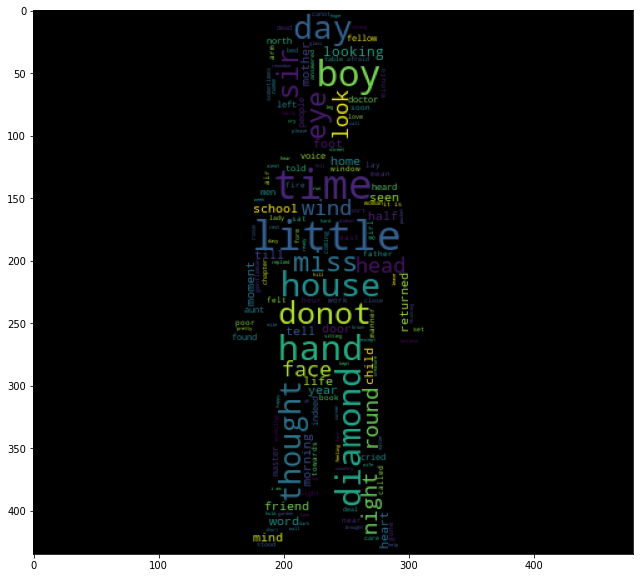

In [116]:
wordcloud_generator(male_authors_raw_count, True)

<b>Female authors</b>

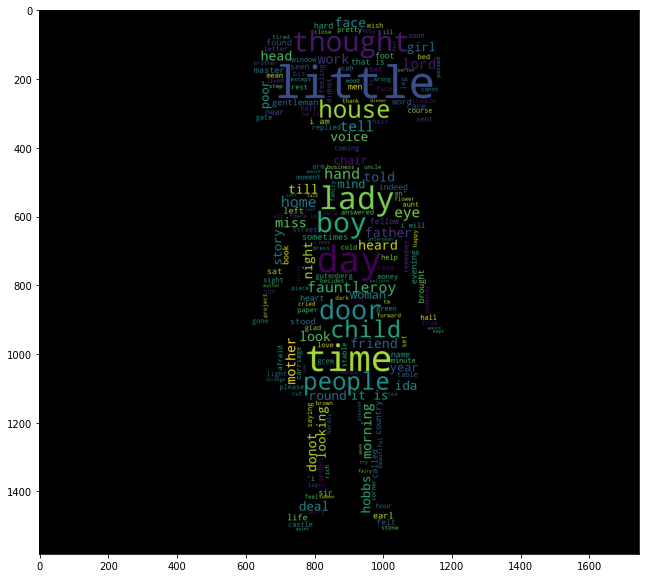

In [117]:
wordcloud_generator(female_authors_raw_count, False)

#### Visualization of emotions

In [ ]:
dict_df = {
    "emotion": [],
    "female_scores":[],
    "male_scores":[]
}
emotion = []
f_auth = []
m_auth = []

for k in f_emotions:
    dict_df["emotion"].append(k)
    dict_df["female_scores"].append(f_emotions[k])
    dict_df["male_scores"].append(m_emotions[k])
    emotion.append(k)
    f_auth.append(f_emotions[k])
    m_auth.append(m_emotions[k])


emotions_df = pd.DataFrame(dict_df)
emotions_df

,emotion,female_scores,male_scores
0,fear,0.065818,0.086382
1,anger,0.040105,0.062913
2,trust,0.116950,0.122711
3,surprise,0.073298,0.054986
4,positive,0.175036,0.190038
5,negative,0.173901,0.156765
6,sadness,0.087316,0.076405
7,disgust,0.042579,0.046853
8,joy,0.110725,0.099598
9,anticipation,0.114270,0.103350


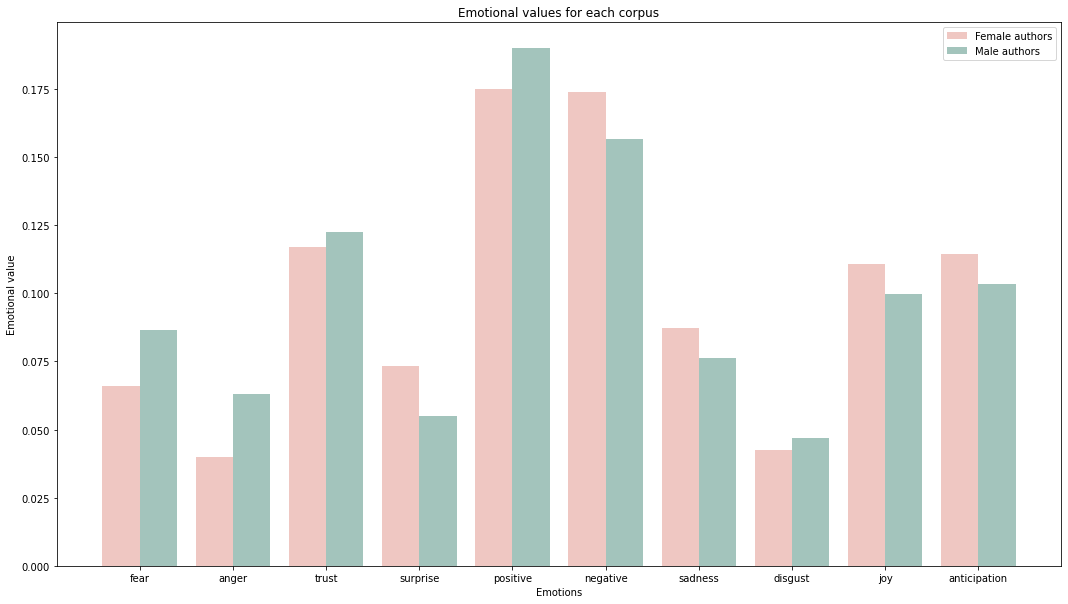

In [ ]:
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(emotion))

f, ax = plt.subplots(figsize=(18,10)) 
plt.bar(X_axis - 0.2, f_auth, 0.4, label = 'Female authors', color=["#EFC7C2"])
plt.bar(X_axis + 0.2, m_auth, 0.4, label = 'Male authors', color=["#A3C4BC"])
  
plt.xticks(X_axis, emotion)
plt.xlabel("Emotions")
plt.ylabel("Emotional value")
plt.title("Emotional values for each corpus")
plt.legend()
plt.show()

Raw/M/1857_hughes-tom-browns-school-days.txt


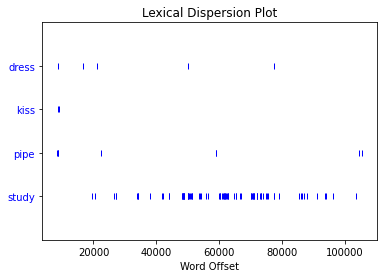

Raw/M/1865_carroll-alices-adventures-in-wonderland.txt


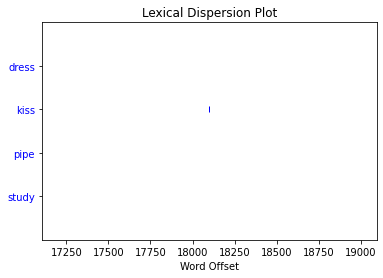

Raw/M/1869_dickens-david-copperfield.txt


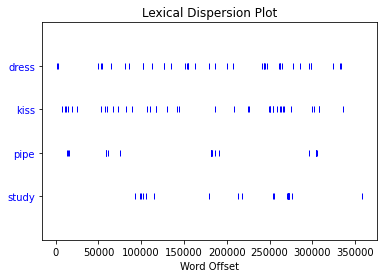

Raw/M/1871_macdonald-at-the-back-of-the-north-wind.txt


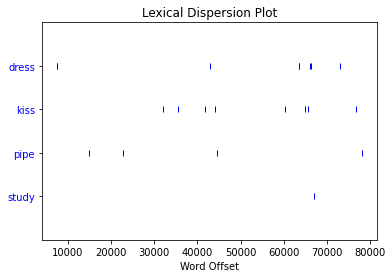

Raw/M/1876_twain-the-adventures-of-tom-sawyer.txt


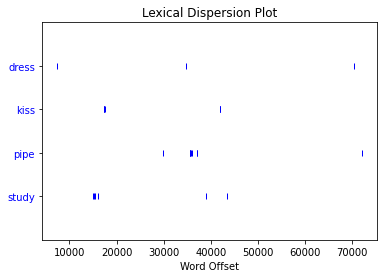

Raw/M/1883_stevenson-treasure-island.txt


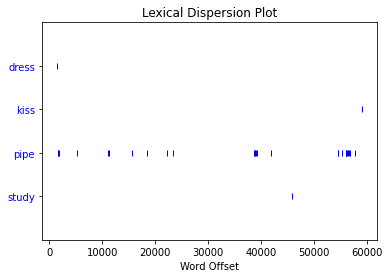

Raw/M/1888_wilde-the-happy-prince-and-other-tales.txt


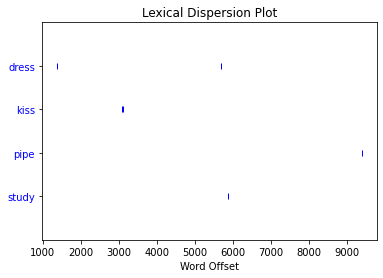

Raw/M/1894_kipling-the-jungle-book.txt


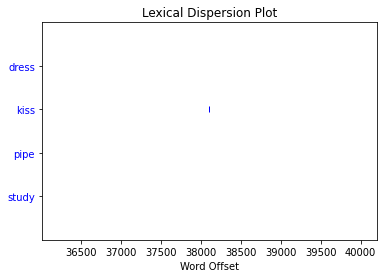

In [ ]:
for url in m_authors_texts:
    print(url)
    text = text_reader(url) 
    word_dispersion_plot(['dress','kiss','pipe','study'], text, remove_punctuation=True)

#### Section 4: Computing some graphs

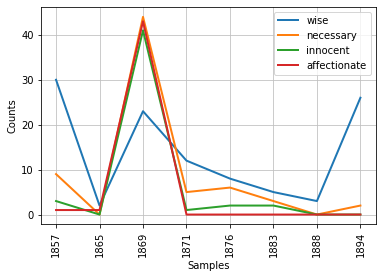

<ConditionalFreqDist with 4 conditions>

In [ ]:
conditional_frequency_distribution(["innocent","affectionate","wise","necessary"], m_corpus)

#### Section 5: Results

#### Section 6: Conclusions